In [ ]:
#  !wget -c https://repo.anaconda.com/archive/Anaconda3-2020.02-Linux-x86_64.sh
#  !chmod +x Anaconda3-2020.02-Linux-x86_64.sh
#  !bash ./Anaconda3-2020.02-Linux-x86_64.sh -b -f -p /usr/local
#  import sys
#  sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
# !wget -O BTCUSD_H1_201801020000_201902011500.csv  https://www.dropbox.com/s/nszh2vb4z0s36lp/BTCUSD_H1_201801020000_201902011500.csv?dl=0
#!wget -O BTCUSD_M1_202008180814_202011241414.csv  https://www.dropbox.com/s/o73dc1zy09fh1s1/BTCUSD_M1_202008180814_202011241414.csv?dl=0# increamental 2month
#!wget -O BTCUSD_M2_202005132034_202007172358.csv  https://www.dropbox.com/s/yqnseo9bvuspj9j/BTCUSD_M2_202005132034_202007172358.csv?dl=0
!wget -O BTCUSD_M12_201801020000_201902011536.csv https://www.dropbox.com/s/5w473vynn1dm4hc/BTCUSD_M12_201801020000_201902011536.csv?dl=0 # decreasive 1 yr

# link = 'https://drive.google.com/file/d/1nYELPJnUuPrBuo7mOcDpmNRp0QbasOmE/view?usp=sharing'
# from pydrive.auth import GoogleAuth 
# from pydrive.drive import GoogleDrive 
# from google.colab import auth 
# from oauth2client.client import GoogleCredentials 
  
  
# # Authenticate and create the PyDrive client. 
# auth.authenticate_user() 
# gauth = GoogleAuth() 
# gauth.credentials = GoogleCredentials.get_application_default() 
# drive = GoogleDrive(gauth)  
# import pandas as pd 
  
# # to get the id part of the file 
# id = link.split("/")[-2] 
  
# downloaded = drive.CreateFile({'id':id})  
# downloaded.GetContentFile('BTCUSD_M1_202009020809_202012091355.csv')   
  
# df = pd.read_csv('BTCUSD_M12_201801020000_201902011536.csv')
  

--2020-12-10 11:35:25--  https://www.dropbox.com/s/5w473vynn1dm4hc/BTCUSD_M12_201801020000_201902011536.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5w473vynn1dm4hc/BTCUSD_M12_201801020000_201902011536.csv [following]
--2020-12-10 11:35:25--  https://www.dropbox.com/s/raw/5w473vynn1dm4hc/BTCUSD_M12_201801020000_201902011536.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb704e0720dd0a5d925fe266712.dl.dropboxusercontent.com/cd/0/inline/BEyrWPfB0UUIqyNqf6Y-_ZebNpXWQNOBHlcCICuG9XJHSbmNlrdtu0KbHJE30uNAhwNoolJkc8sMD6PH1Qp3iyKE12YbBXgSX63jhabfzcsE-oMgF7oOFCtKs51v8zF-BEs/file# [following]
--2020-12-10 11:35:25--  https://ucb704e0720dd0a5d925fe266712.dl.dropboxusercontent.com/cd/0/inline/BEyrWPfB0UUIqyNqf6Y-_Z

In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)

data = pd.read_csv('BTCUSD_M12_201801020000_201902011536.csv')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36780 entries, 0 to 36779
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   <DATE>     36780 non-null  object 
 1   <TIME>     36780 non-null  object 
 2   <OPEN>     36780 non-null  float64
 3   <HIGH>     36780 non-null  float64
 4   <LOW>      36780 non-null  float64
 5   <CLOSE>    36780 non-null  float64
 6   <TICKVOL>  36780 non-null  int64  
 7   <VOL>      36780 non-null  int64  
 8   <SPREAD>   36780 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 2.5+ MB


In [ ]:
data.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2018.01.02,0:00:00,13480.75,16419.42,13464.88,13528.91,451,0,40010
1,2018.01.02,0:12:00,13528.98,13626.68,13528.88,13563.34,408,0,40040
2,2018.01.02,0:24:00,13563.33,13599.15,13513.45,13513.46,167,0,40010
3,2018.01.02,0:36:00,13513.46,13583.33,13459.95,13515.46,521,0,40010
4,2018.01.02,0:48:00,13515.52,13580.00,13451.07,13451.07,422,0,40010


In [ ]:
data.tail()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
36775,2019.02.01,14:48:00,3428.38,3430.38,3423.88,3424.63,112,0,1720
36776,2019.02.01,15:00:00,3424.64,3430.38,3424.38,3426.88,76,0,0
36777,2019.02.01,15:12:00,3427.14,3430.39,3425.63,3427.38,99,0,1730
36778,2019.02.01,15:24:00,3426.88,3432.63,3426.88,3431.89,135,0,1730
36779,2019.02.01,15:36:00,3431.88,3437.13,3431.13,3435.38,196,0,230


In [ ]:
import plotly
y= data['<CLOSE>']
btc_trace = go.Scatter(x=data.index, y=data['<CLOSE>'], name= 'Price')
py.plot([btc_trace], filename='data_with_nan.html')

'data_with_nan.html'

In [ ]:
y.replace(0, np.nan, inplace=True)
y.fillna(method='ffill', inplace=True)

btc_trace = go.Scatter(x=data.index, y=data['<CLOSE>'], name= 'Price')
py.plot([btc_trace], filename='data_without_nan.html')

'data_without_nan.html'

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer,normalize
values = y.values.reshape(-1,1)
values = values.astype('float32')
train_size = int(len(values) * 0.7)
test_size = len(values) - train_size
train, test = values[0:train_size,:], values[train_size:len(values),:]

scaler_tr = StandardScaler()
scaler_ts = StandardScaler()
scaled_train = scaler_tr.fit_transform(train)
scaled_test = scaler_ts.fit_transform(test)
print(len(scaled_train), len(scaled_test))


25746 11034


In [ ]:
def create_dataset(dataset, look_back,next_candles):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back-next_candles):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back:(i + look_back+next_candles), 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

look_back = 50
next_candles = 10
trainX, trainY = create_dataset(scaled_train, look_back,next_candles)
testX, testY = create_dataset(scaled_test, look_back,next_candles)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

25686
10974


In [ ]:
model = Sequential()
model.add(LSTM(256,return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(LSTM(256,return_sequences=False, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(next_candles))
model.compile(loss='mse', optimizer='adam')
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(trainX, trainY, epochs=50, batch_size=100, validation_split=0.2, verbose=1, shuffle=False)

In [ ]:
model.save('model.h5')

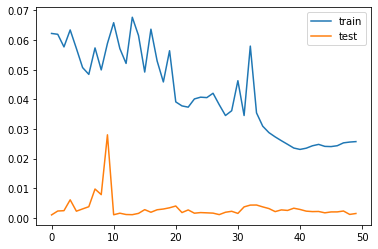

In [ ]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
yhat = model.predict(testX, verbose=1)

343/343 [==============================] - 1s 2ms/step


In [ ]:
yhat_inverse = scaler_ts.inverse_transform(yhat)
testY_inverse = scaler_ts.inverse_transform(testY)

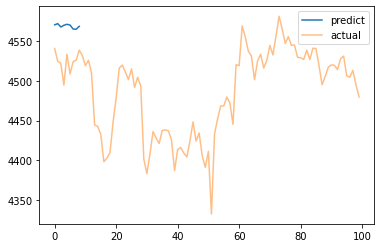

In [ ]:
predicts = np.concatenate((yhat_inverse[5000:5000,0],yhat_inverse[4999,1:10]))
pyplot.plot(predicts, label='predict')
pyplot.plot(testY_inverse[5000:5100,0], label='actual', alpha=0.5)
pyplot.legend()
pyplot.show()

In [ ]:
pyplot.plot(yhat_inverse-testY_inverse, label='predict')
# pyplot.plot(testY_inverse, label='actual', alpha=0.5)
pyplot.legend()
pyplot.show()

In [ ]:
predictDates = data.tail(len(testX)).index
testY_reshape = testY_inverse.reshape(len(testY_inverse))
yhat_reshape = yhat_inverse.reshape(len(yhat_inverse))

actual_chart = go.Scatter(x=predictDates, y=testY_reshape, name= 'Actual Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.plot([predict_chart, actual_chart], filename='actual+prediction.html')

In [ ]:
# next_candles = 10
# # last_predics = []
# for i in range(next_candles):
#   if i==0:
#     yhat = model.predict(testX, verbose=1)
#     last_predict = np.reshape(yhat[-1,0],(1,1))
#     # last_predics.append(last_predict)
#     # print(last_predict)
#   else:
#     scaled_test_temp = np.concatenate((scaled_test_temp, last_predict), axis=0)
#     testX_temp, testY_temp = create_dataset(scaled_test_temp, look_back)
#     testX_temp.shape
#     testX_temp = np.reshape(testX_temp, (testX_temp.shape[0], 1, testX_temp.shape[1]))
#     yhat = model.predict(testX_temp, verbose=1)
#     last_predict = np.reshape(yhat[-1,0],(1,1))
#     # last_predics.append(last_predict)
#     # print(last_predict)
# #print(trainX.shape)
# # trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# # testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


# # for i in range(next_candles):
# #   1)

# # pyplot.plot(yhat, label='predict')
# # pyplot.plot(testY, label='true')
# # pyplot.legend()
# # #axzoom = pyplot.subplot()
# # #axzoom.set(xlim =(2.45e5, 2.4e5), ylim =(0.2, 0.275), autoscale_on = False)
# # pyplot.show()

In [ ]:
model.save('model1.h5')

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

values = data[['Weighted_Price'] + ['Volume_(BTC)'] + ['Volume_(Currency)']].values
values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

In [ ]:
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)
print(reframed.head())

In [ ]:
values = reframed.values
n_train_hours = int(len(values) * 0.7)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

multi_model = Sequential()
multi_model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
multi_model.add(Dense(1))
multi_model.compile(loss='mae', optimizer='adam')
multi_history = multi_model.fit(train_X, train_y, epochs=15, batch_size=512, validation_data=(test_X, test_y), verbose=0, shuffle=False)

In [ ]:
pyplot.plot(multi_history.history['loss'], label='multi_train')
pyplot.plot(multi_history.history['val_loss'], label='multi_test')
pyplot.legend()
pyplot.show()

In [ ]:
yhat = multi_model.predict(test_X)
pyplot.plot(yhat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()

In [ ]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
actual_chart = go.Scatter(x=predictDates, y=inv_y, name= 'Actual Price')
multi_predict_chart = go.Scatter(x=predictDates, y=inv_yhat, name= 'Multi Predict Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.plot([predict_chart, multi_predict_chart, actual_chart])